In [1]:
import os
print(os.getcwd()) 


C:\Users\mutha


In [2]:
os.chdir(r"C:\Users\mutha\Downloads")  
print(os.getcwd())


C:\Users\mutha\Downloads


In [8]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Prediction.csv")
print(df.head()) 

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [7]:
#tail
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [9]:
#Shape
df.shape


(270, 14)

In [10]:
#infor()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [11]:
#finding missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [12]:
#Finding the percentage of missing values
df.isnull().sum()/df.shape[0]*100

Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

In [13]:
#identifying garbage values
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include=object).columns:
    print(df [i].value_counts())
    print("***" * 10)

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64
******************************


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


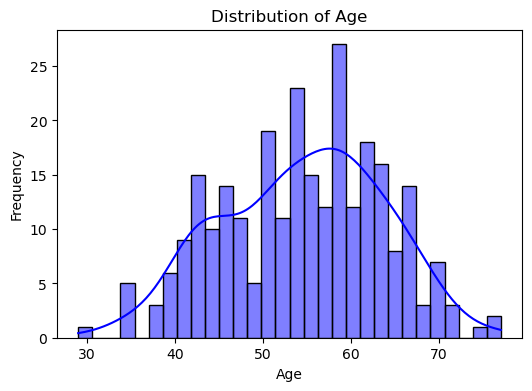

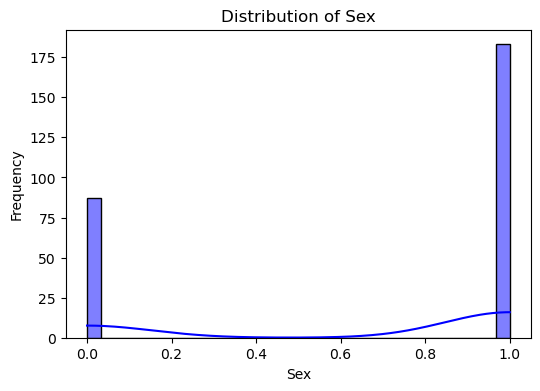

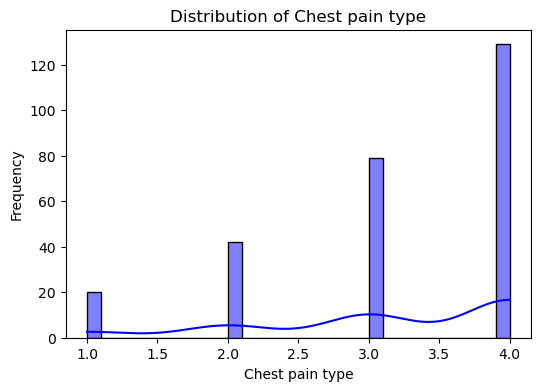

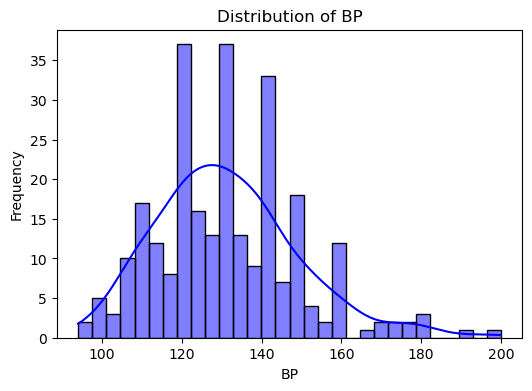

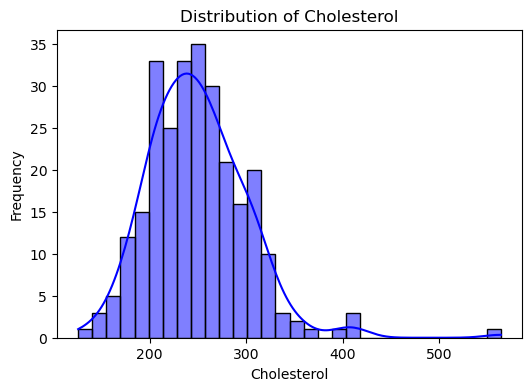

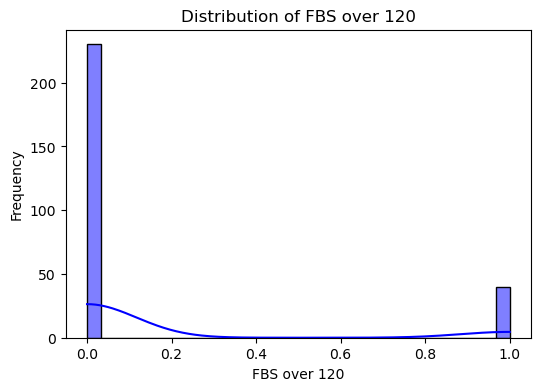

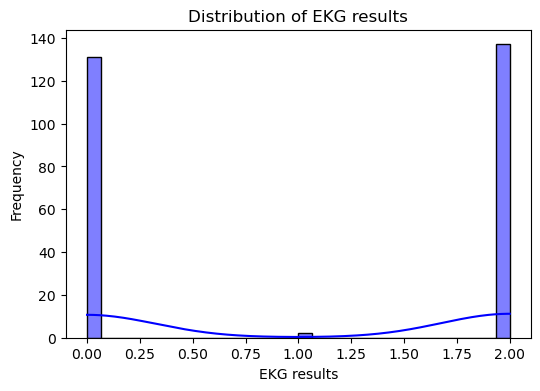

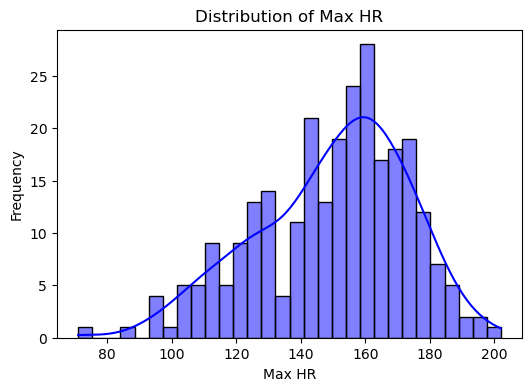

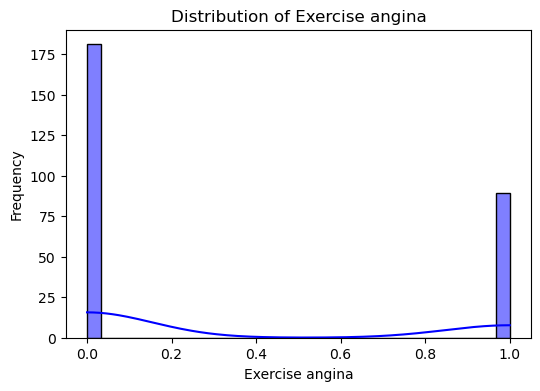

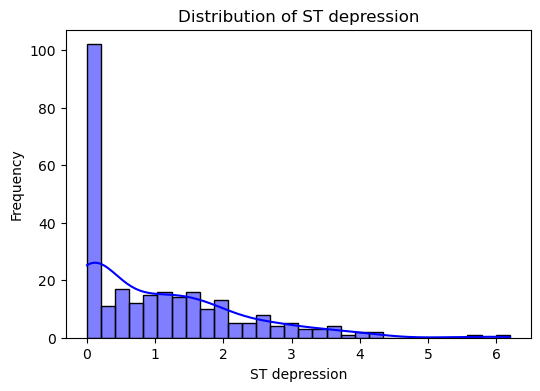

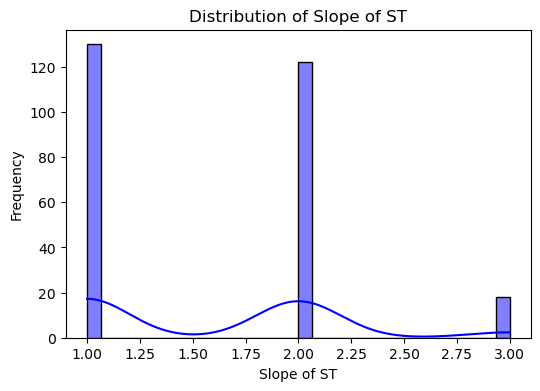

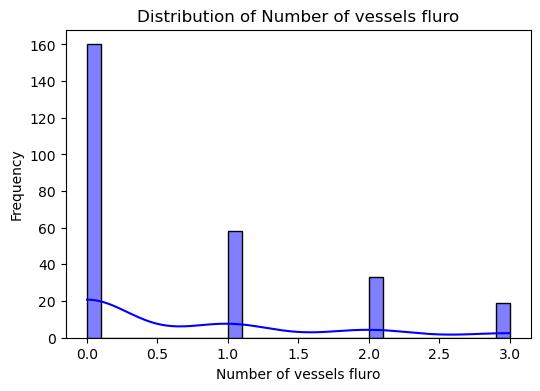

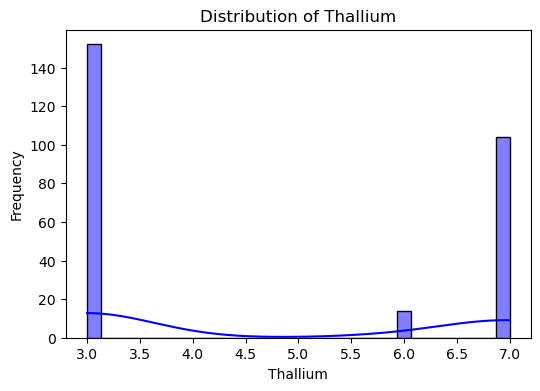

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical data
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalizing features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display processed data
print("\nProcessed Data (First 5 rows):")
print(df_scaled.head())


Processed Data (First 5 rows):
        Age       Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.712094  0.689500         0.870928 -0.075410     1.402212     -0.417029   
1  1.382140 -1.450327        -0.183559 -0.916759     6.093004     -0.417029   
2  0.282294  0.689500        -1.238045 -0.411950     0.219823     -0.417029   
3  1.052186  0.689500         0.870928 -0.187590     0.258589     -0.417029   
4  2.152032 -1.450327        -1.238045 -0.636310     0.374890     -0.417029   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0     0.981664 -1.759208        -0.701222       1.181012     0.676419   
1     0.981664  0.446409        -0.701222       0.481153     0.676419   
2    -1.026285 -0.375291        -0.701222      -0.656118    -0.954234   
3    -1.026285 -1.932198         1.426081      -0.743600     0.676419   
4     0.981664 -1.240239         1.426081      -0.743600    -0.954234   

   Number of vessels fluro  Thallium  Heart Disease  


In [17]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64